In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/New_Dataset/train'
valid_path = '/content/drive/MyDrive/New_Dataset/test'

In [ ]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/New_Dataset/train/*')

In [ ]:
folders

['/content/drive/MyDrive/New_Dataset/train/covid+',
 '/content/drive/MyDrive/New_Dataset/train/normal']

In [ ]:
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New_Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 846 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New_Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 280 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
27/27 [==============================] - 733s 27s/step - loss: 0.1445 - accuracy: 0.9385 - val_loss: 0.0571 - val_accuracy: 0.9821
Epoch 2/10
27/27 [==============================] - 432s 16s/step - loss: 0.0344 - accuracy: 0.9870 - val_loss: 0.0450 - val_accuracy: 0.9821
Epoch 3/10
27/27 [==============================] - 431s 16s/step - loss: 0.0260 - accuracy: 0.9905 - val_loss: 0.0371 - val_accuracy: 0.9893
Epoch 4/10
27/27 [==============================] - 431s 16s/step - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.0251 - val_accuracy: 0.9893
Epoch 5/10
27/27 [==============================] - 432s 16s/step - loss: 0.0276 - accuracy: 0.9905 - val_loss: 0.0234 - val_accuracy: 0.9893
Epoch 6/10
27/27 [==============================] - 433s 16s/step - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.0192 - val_accuracy: 0.9964
Epoch 7/10
27/27 [==============================] - 433s 16s/step - loss: 0.0168 - accuracy: 0.9941 - val_loss: 0.0292 - val_accuracy: 0.9893
Epoch 

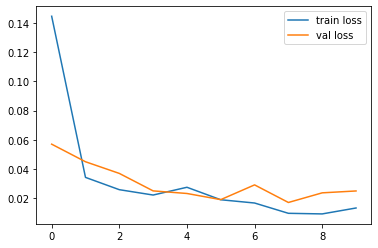

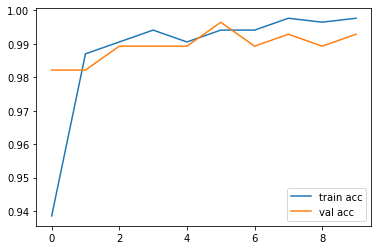

In [ ]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:

y_pred = model.predict(test_set)
y_pred

array([[4.41157511e-07, 9.99999523e-01],
       [3.06456900e-06, 9.99996901e-01],
       [3.38094810e-06, 9.99996662e-01],
       [9.99802530e-01, 1.97464993e-04],
       [1.49953416e-06, 9.99998450e-01],
       [3.56823080e-07, 9.99999642e-01],
       [1.09409953e-07, 9.99999881e-01],
       [9.99277055e-01, 7.22953468e-04],
       [1.11849920e-06, 9.99998927e-01],
       [1.46077554e-07, 9.99999881e-01],
       [2.60865733e-07, 9.99999762e-01],
       [9.96040106e-01, 3.95989232e-03],
       [2.79758642e-05, 9.99971986e-01],
       [5.74399246e-06, 9.99994278e-01],
       [9.98498559e-01, 1.50146545e-03],
       [9.97528374e-01, 2.47166492e-03],
       [5.39336256e-08, 1.00000000e+00],
       [9.99437511e-01, 5.62421395e-04],
       [4.77315538e-04, 9.99522686e-01],
       [1.35773269e-04, 9.99864221e-01],
       [1.37172565e-05, 9.99986291e-01],
       [1.32860009e-06, 9.99998689e-01],
       [1.99828628e-06, 9.99997973e-01],
       [5.00854185e-07, 9.99999523e-01],
       [5.041704

In [ ]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/New_Dataset/test/normal/IM-0221-0001.jpeg',target_size=(224,224))

In [28]:
x=image.img_to_array(img)
x

array([[[38., 38., 38.],
        [49., 49., 49.],
        [54., 54., 54.],
        ...,
        [37., 37., 37.],
        [ 6.,  6.,  6.],
        [ 7.,  7.,  7.]],

       [[38., 38., 38.],
        [48., 48., 48.],
        [57., 57., 57.],
        ...,
        [36., 36., 36.],
        [ 3.,  3.,  3.],
        [ 7.,  7.,  7.]],

       [[37., 37., 37.],
        [49., 49., 49.],
        [53., 53., 53.],
        ...,
        [25., 25., 25.],
        [ 5.,  5.,  5.],
        [ 7.,  7.,  7.]],

       ...,

       [[21., 21., 21.],
        [19., 19., 19.],
        [17., 17., 17.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]],

       [[19., 19., 19.],
        [18., 18., 18.],
        [19., 19., 19.],
        ...,
        [17., 17., 17.],
        [15., 15., 15.],
        [17., 17., 17.]],

       [[22., 22., 22.],
        [20., 20., 20.],
        [17., 17., 17.],
        ...,
        [19., 19., 19.],
        [16., 16., 16.],
        [16., 16., 16.]]

In [29]:

x.shape

(224, 224, 3)

In [30]:
x=x/255

In [31]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [32]:

model.predict(img_data)

array([[9.9949074e-01, 5.0919724e-04]], dtype=float32)

In [33]:
a=np.argmax(model.predict(img_data), axis=1)

In [34]:
if(a==1):
    print("Normal")
else:
    print("Covid Positive")

Covid Positive
